In [34]:
import numpy as np
import tensorflow as tf
import pandas as pd
from keras import layers
from keras.layers import Input, Add, Dense, Activation, ZeroPadding2D, BatchNormalization, Flatten, Conv2D, AveragePooling2D, MaxPooling2D, GlobalMaxPooling2D
import matplotlib.pyplot as plt
from keras.models import Model, load_model

#### Reading the Dataset


In [15]:
train_df = pd.read_csv("dataset/mnist_train.csv")
test_df = pd.read_csv("dataset/mnist_test.csv")


In [16]:
train_df

label  1x1  1x2  1x3  1x4  1x5  1x6  1x7  1x8  1x9  ...  28x19  28x20  \
0          5    0    0    0    0    0    0    0    0    0  ...      0      0   
1          0    0    0    0    0    0    0    0    0    0  ...      0      0   
2          4    0    0    0    0    0    0    0    0    0  ...      0      0   
3          1    0    0    0    0    0    0    0    0    0  ...      0      0   
4          9    0    0    0    0    0    0    0    0    0  ...      0      0   
...      ...  ...  ...  ...  ...  ...  ...  ...  ...  ...  ...    ...    ...   
59995      8    0    0    0    0    0    0    0    0    0  ...      0      0   
59996      3    0    0    0    0    0    0    0    0    0  ...      0      0   
59997      5    0    0    0    0    0    0    0    0    0  ...      0      0   
59998      6    0    0    0    0    0    0    0    0    0  ...      0      0   
59999      8    0    0    0    0    0    0    0    0    0  ...      0      0   

       28x21  28x22  28x23  28x24  28x25  28x26  28x27  28x28  
0          0      0      0      0      0      0      0      0  
1          0      0      0      0      0      0      0      0  
2          0      0      0      0      0      0      0      0  
3          0      0      0      0      0      0      0      0  
4          0      0      0      0      0      0      0      0  
...      ...    ...    ...    ...    ...    ...    ...    ...  
59995      0      0      0      0      0      0      0      0  
59996      0      0      0      0      0      0      0      0  
59997      0      0      0      0      0      0      0      0  
59998      0      0      0      0      0      0      0      0  
59999      0      0      0      0      0      0      0      0  

[60000 rows x 785 columns]

In [56]:
train = np.array(train_df)
test = np.array(test_df)

Y_train = np.zeros((train.shape[0], 10))
X_train = []
Y_test = np.zeros((test.shape[0], 10))
X_test = []

for i in range(train.shape[0]):
    X_train.append(train[i,1:].reshape((28,28,1)))
    Y_train[i,train[i,0]] = 1
    
for i in range(test.shape[0]):
    X_test.append(test[i,1:].reshape((28,28,1)))
    Y_test[i,test[i,0]] = 1

X_train = np.array(X_train)
X_test = np.array(X_test)
print(X_test.shape)
print(X_train.shape)
print(Y_test.shape)
print(Y_train.shape)

(10000, 28, 28, 1)
(60000, 28, 28, 1)
(10000, 10)
(60000, 10)


[0. 0. 0. 1. 0. 0. 0. 0. 0. 0.]


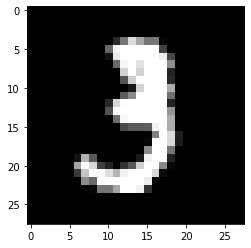

In [57]:
idx = 10
sammple = X_train[idx,:]
print(Y_train[idx])
plt.imshow(sample, cmap = "gray")

In [68]:
def LeNet5(input_shape = (28,28,1), stride  = [1,1], filters = [5,5], pooling = [2,2], activation = ["relu", "relu", "relu", "relu"], n_filters = [6,16], n_layers = [120,84]):
    
    
    s1,s2 = stride
    f1,f2 = filters
    p1,p2 = pooling
    
    a1,a2,a3,a4 = activation
    nf1, nf2 = n_filters
    nl1, nl2 = n_layers
    
    X_input = Input(input_shape)
    X = ZeroPadding2D((2,2))(X_input)
    
    X = Conv2D(filters =  nf1, kernel_size = (f1,f1), strides = (s1,s1), activation = a1, input_shape = (32,32,1))(X)
    X = MaxPooling2D(( p1, p1), strides=(2, 2))(X)
    
    X = Conv2D(filters = nf2, kernel_size = (f2,f2), strides = (s2,s2), activation = a2)(X)
    X = MaxPooling2D(( p2, p2), strides=(2, 2))(X)
    
    X = Flatten()(X)
    
    X = Dense(nl1, activation = a3)(X)
    
    X = Dense(nl2, activation = a4)(X)
    
    X = Dense(10, activation = 'softmax')(X)
    
    
    model  = Model(inputs = X_input, outputs = X, name='LeNet5')
    
    return model
    


#### Original LeNet 5 


In [69]:
model = LeNet5()
model.summary()

Model: "LeNet5"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_7 (InputLayer)         [(None, 28, 28, 1)]       0         
_________________________________________________________________
zero_padding2d_6 (ZeroPaddin (None, 32, 32, 1)         0         
_________________________________________________________________
conv2d_12 (Conv2D)           (None, 28, 28, 6)         156       
_________________________________________________________________
max_pooling2d_12 (MaxPooling (None, 14, 14, 6)         0         
_________________________________________________________________
conv2d_13 (Conv2D)           (None, 10, 10, 16)        2416      
_________________________________________________________________
max_pooling2d_13 (MaxPooling (None, 5, 5, 16)          0         
_________________________________________________________________
flatten_6 (Flatten)          (None, 400)               0    

In [70]:
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

In [72]:
model.fit(X_train, Y_train, epochs = 10, batch_size = 512) 
preds = model.evaluate(X_test, Y_test)
preds = model.evaluate(X_test, Y_test)
print ("Loss = " + str(preds[0]))
print ("Test Accuracy = " + str(preds[1]))

Epoch 1/10
118/118 [==============================] - 19s 158ms/step - loss: 0.1448 - accuracy: 0.9557
Epoch 2/10
118/118 [==============================] - 19s 162ms/step - loss: 0.0959 - accuracy: 0.9704
Epoch 3/10
118/118 [==============================] - 19s 159ms/step - loss: 0.0712 - accuracy: 0.9777
Epoch 4/10
118/118 [==============================] - 19s 160ms/step - loss: 0.0555 - accuracy: 0.9830
Epoch 5/10
118/118 [==============================] - 18s 156ms/step - loss: 0.0473 - accuracy: 0.9849
Epoch 6/10
118/118 [==============================] - 19s 162ms/step - loss: 0.0372 - accuracy: 0.9885
Epoch 7/10
118/118 [==============================] - 19s 164ms/step - loss: 0.0297 - accuracy: 0.9907
Epoch 8/10
118/118 [==============================] - 18s 156ms/step - loss: 0.0238 - accuracy: 0.9929
Epoch 9/10
118/118 [==============================] - 22s 183ms/step - loss: 0.0193 - accuracy: 0.9942
Epoch 10/10
313/313 [==============================] - 3s 9ms/step - loss